In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords | {'a', 'ante', 'bajo', 'con', 'de', 'desde', 'durante', 
                         'en', 'entre', 'excepto', 'hacia', 'hasta', 'mediante', 
                         'para', 'por', 'salvo', 'según', 'sin', 'sobre', 'y', 'tras',
                        'el', 'la', 'lo', 'su', 'un', 'una', 'que', 'al'}

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Carga de datos corregidos

In [2]:
# %timeit sirve para evaluar el tiempo de ejecucion
print("------------------");
df_postulantes_educacion = pd.read_csv('../csv/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
print("###", end='');
df_postulantes_genero_edad = pd.read_csv('../csv/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad_fix.csv')
print("###", end='');
df_vistas_general = pd.read_csv('../csv/datos_navent_fiuba/fiuba_3_vistas.csv')
print("###", end='');
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv')
print("###", end='');
df_avisos_online = pd.read_csv('../csv/datos_navent_fiuba/fiuba_5_avisos_online.csv')
print("###", end='');
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
print("###");
print("------------------");

------------------
##################
------------------


### PreProcesamiento

In [3]:
df_postulantes_genero_edad['edad'] = (pd.to_datetime('today').year - pd.to_datetime(df_postulantes_genero_edad['fechanacimiento']).dt.year)

---
## Cantidad de usuarios registrados por edad y genero

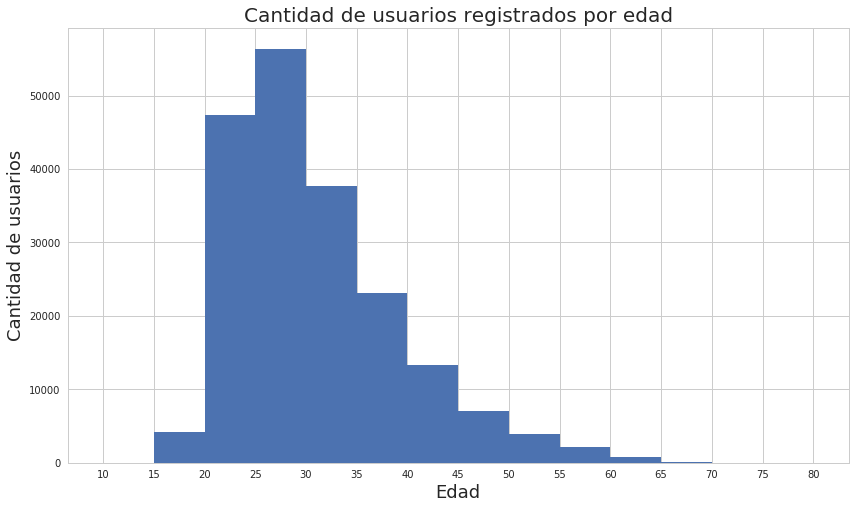

In [11]:
df_postulantes_genero_edad['edad'].dropna().hist(figsize=(14,8), bins=14, range=[10, 80]);
plt.xlabel('Edad', fontsize=18);
plt.ylabel('Cantidad de usuarios', fontsize=18)
plt.title('Cantidad de usuarios registrados por edad', fontsize=20);
plt.xticks(range(10, 81, 5))
plt.show();

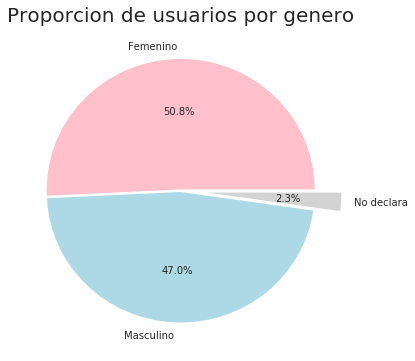

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Proporcion de usuarios por genero', fontsize=20)
plt.pie(df_postulantes_genero_edad['sexo'].value_counts(), 
        labels=['Femenino', 'Masculino', 'No declara'], autopct='%1.1f%%', 
        startangle=0, 
        colors=['pink', 'lightblue', 'lightgray'], 
        explode=(0.01, 0.01, 0.2))
plt.show()

In [128]:
# TO DO: Stacked hist con usuarios por genero y edad

---
## Postulaciones de trabajo según rango de edad y genero

In [4]:
df_temp = pd.merge(df_postulantes_genero_edad, df_postulaciones, 
         on='idpostulante', how='inner')
df_temp.head()

,Unnamed: 0,idpostulante,fechanacimiento,sexo,edad,idaviso,fechapostulacion
0,0,NM5M,1970-12-03,FEM,48,1112257047,2018-01-15 16:22:34
1,0,NM5M,1970-12-03,FEM,48,1111920714,2018-02-06 09:04:50
2,0,NM5M,1970-12-03,FEM,48,1112346945,2018-02-22 09:04:47
3,0,NM5M,1970-12-03,FEM,48,1112345547,2018-02-22 09:04:59
4,1,5awk,1962-12-04,FEM,56,1112237522,2018-01-25 18:55:03


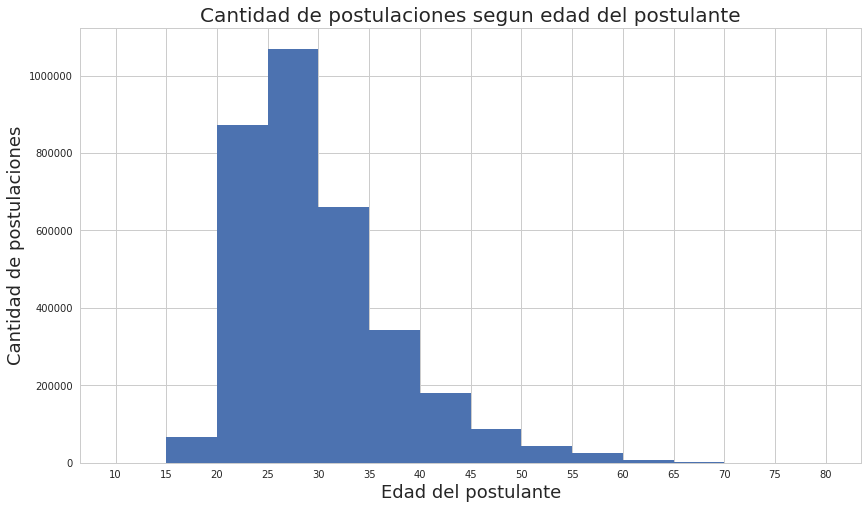

In [8]:
df_temp['edad'].dropna().hist(figsize=(14,8), bins=14, range=[10, 80]);
plt.xlabel('Edad del postulante', fontsize=18);
plt.ylabel('Cantidad de postulaciones', fontsize=18)
plt.title('Cantidad de postulaciones segun edad del postulante', fontsize=20);
plt.xticks(range(10, 81, 5))
plt.show();

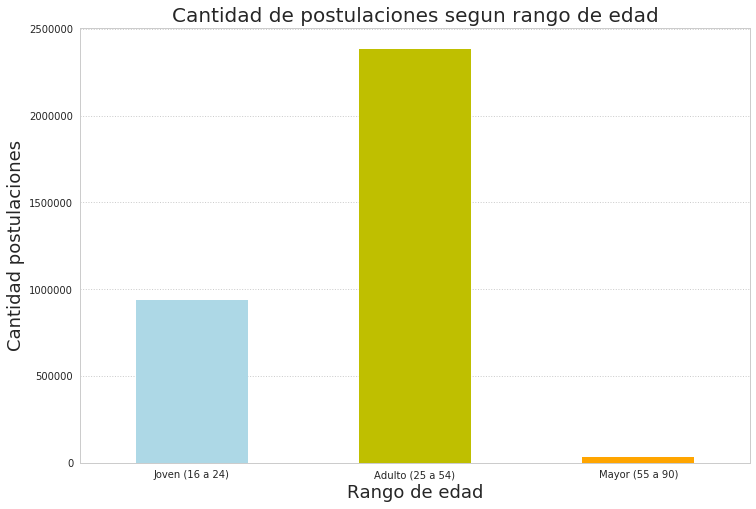

In [18]:
res_temp = pd.Series([(df_temp['edad'].dropna().between(16, 24, inclusive=True)).sum(),
           (df_temp['edad'].dropna().between(25, 54, inclusive=True)).sum(),
           (df_temp['edad'].dropna().between(55, 90, inclusive=True)).sum()])
col = ['lightblue','y','Orange']
plot = res_temp.plot(kind='bar', figsize=(12,8), rot=0, color=col)
plot.set_xlabel('Rango de edad', fontsize=18)
plot.set_ylabel('Cantidad postulaciones', fontsize=18)
plot.set_title('Cantidad de postulaciones segun rango de edad', fontsize=20)
plot.set_xticklabels( ('Joven (16 a 24)', 'Adulto (25 a 54)','Mayor (55 a 90)'))
plot.grid(linestyle='dotted')
plot.xaxis.grid(False);

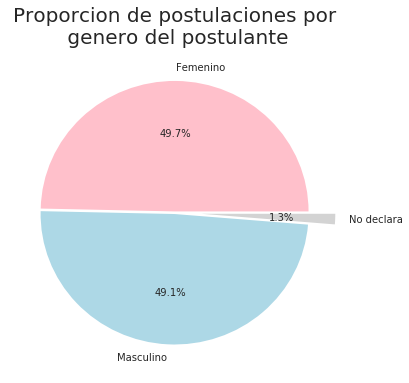

In [19]:
plt.figure(figsize=(6, 6))
plt.title('Proporcion de postulaciones por\n genero del postulante', fontsize=20)
plt.pie(df_temp['sexo'].value_counts(), 
        labels=['Femenino', 'Masculino', 'No declara'], autopct='%1.1f%%', 
        startangle=0, 
        colors=['pink', 'lightblue', 'lightgray'], 
        explode=(0.01, 0.01, 0.2))
plt.show()

## Publicaciones y Postulaciones según longitud de la descripción

A la descripcion se le quitan las etiquetas HTML porque no determinan la longitud del **contenido** de la descripcion

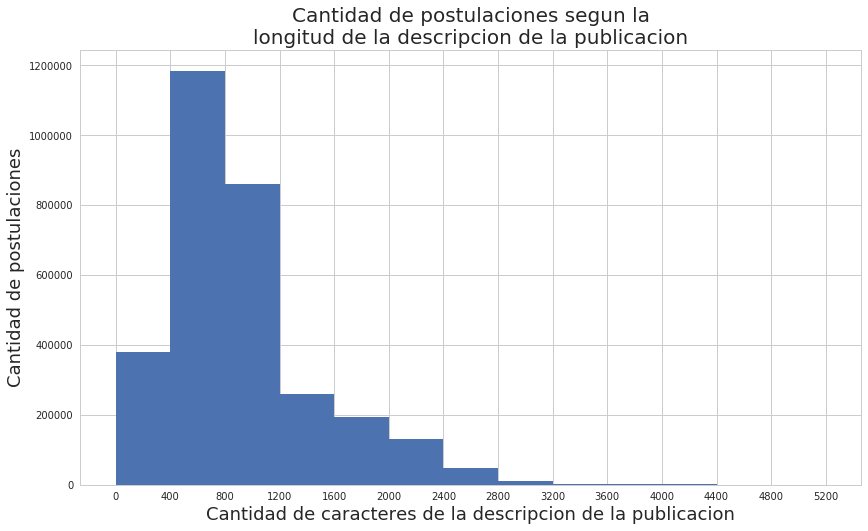

In [118]:
df_temp = df_avisos_detalle.copy()
df_temp['descripcion'] = df_temp['descripcion'].replace('<[^>]*>', '', regex=True)
df_temp = pd.merge(df_temp, df_postulaciones, 
         on='idaviso', how='inner')
df_temp['descripcion'].dropna().apply(len).hist(
    figsize=(14,8), bins=13, range=[0, 5201]);
plt.xlabel('Cantidad de caracteres de la descripcion de la publicacion', fontsize=18);
plt.ylabel('Cantidad de postulaciones', fontsize=18)
plt.title('Cantidad de postulaciones segun la\nlongitud de la descripcion de la publicacion', fontsize=20);
plt.xticks(range(0, 5201, 400))
plt.show();

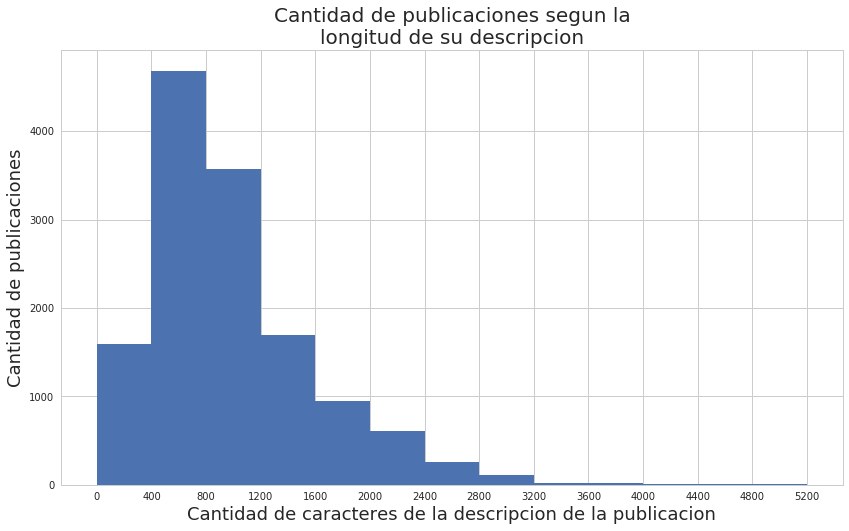

In [117]:
df_avisos_detalle['descripcion'].dropna().replace('<[^>]*>', '', regex=True).apply(len).hist(
    figsize=(14,8), bins=13, range=[0, 5201]);
plt.xlabel('Cantidad de caracteres de la descripcion de la publicacion', fontsize=18);
plt.ylabel('Cantidad de publicaciones', fontsize=18)
plt.title('Cantidad de publicaciones segun la\nlongitud de su descripcion', fontsize=20);
plt.xticks(range(0, 5201, 400))
plt.show();

## Frecuencia de palabras en titulos y descripciones

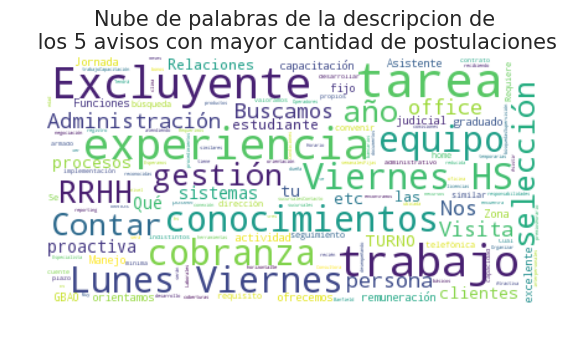

In [247]:
arr_temp = pd.merge(df_avisos_detalle, df_postulaciones.loc[df_postulaciones['idaviso'].value_counts().head(5)], 
         on='idaviso', how='inner')['descripcion']
arr_temp = arr_temp.replace('<[^>]*>', '', regex=True).replace({'\xa0': ''}, regex=True)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(arr_temp.values))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras de la descripcion de\n los 5 avisos con mayor cantidad de postulaciones', fontsize=15);
plt.show()

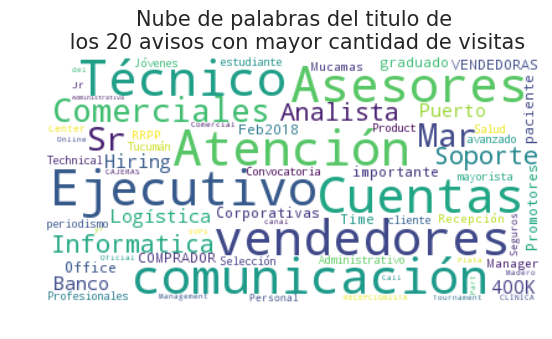

In [248]:
arr_temp = pd.merge(df_avisos_detalle, df_vistas_general.loc[df_vistas_general['idAviso'].value_counts().head(20)], 
         left_on='idaviso', right_on='idAviso', how='inner')['titulo']

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(arr_temp.values))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras del titulo de\n los 20 avisos con mayor cantidad de visitas', fontsize=15);
plt.show()

## Visitas de avisos por area

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


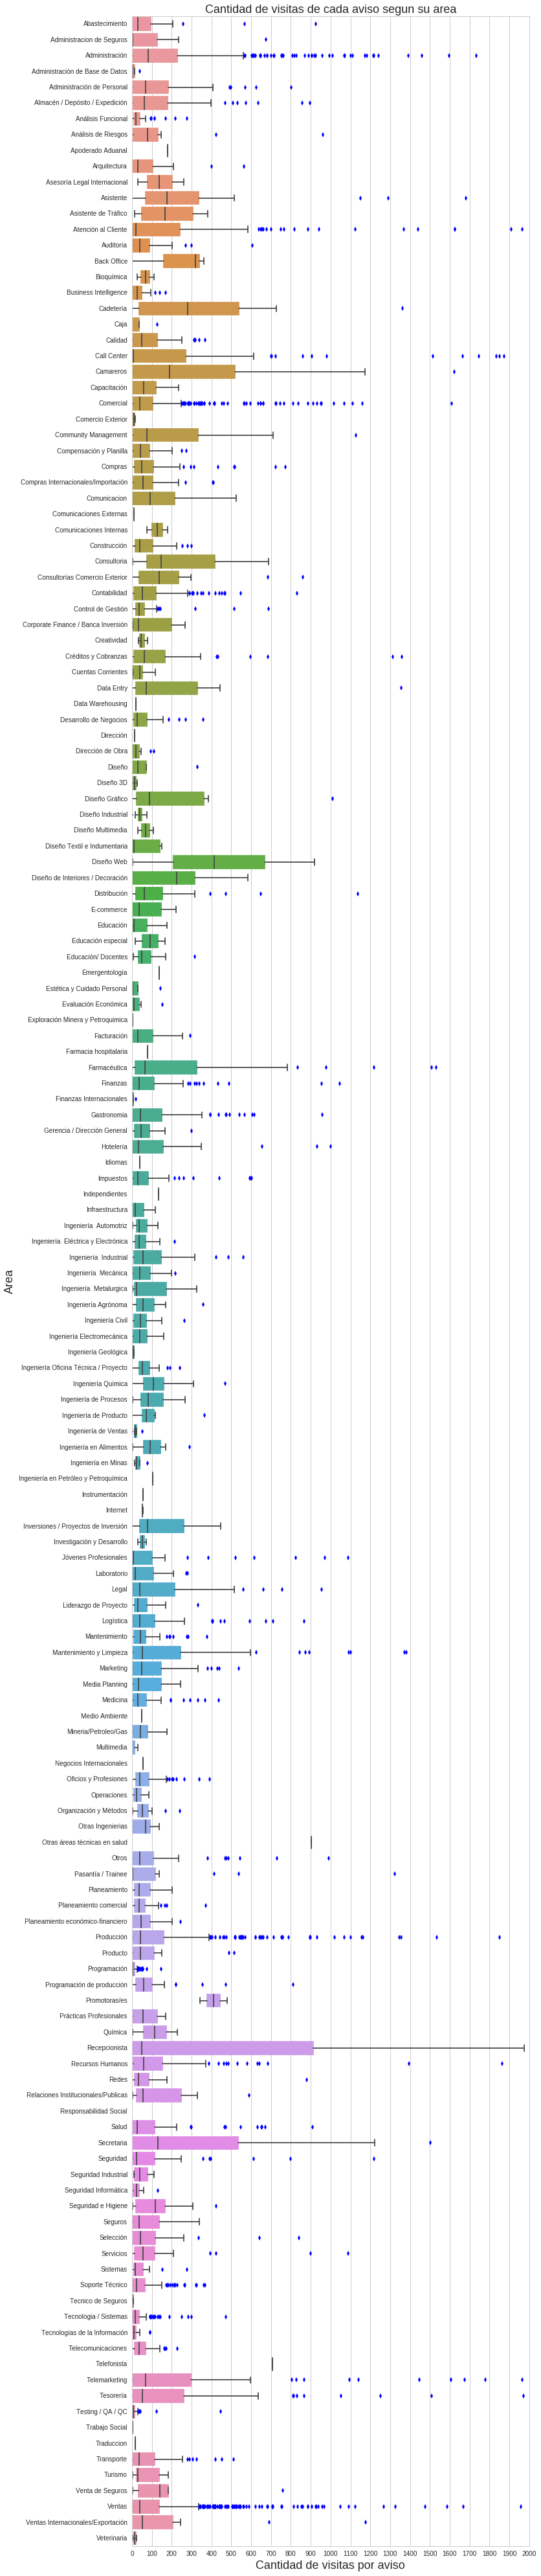

In [9]:
df_temp = pd.merge(df_avisos_detalle, df_vistas_general, 
         left_on='idaviso', right_on='idAviso', how='inner')[['idaviso', 'nombre_area']]

df_temp['cant'] = df_temp.groupby('idaviso')['idaviso'].transform('count')
df_temp.drop_duplicates(inplace=True)
df_temp.sort_values(by='nombre_area', inplace=True)

plt.figure(figsize = (11,70))
plot = sns.boxplot(y='nombre_area',x='cant',data=df_temp, )
plot.set_xlim([0, 1000])
plot.set_ylabel('Area',size=18)
plot.set_xlabel('Cantidad de visitas por aviso',size=18)
plot.set_title('Cantidad de visitas de cada aviso segun su area',fontsize=18)
plot.set_xticks(range(0, 2001, 100))
plt.show();

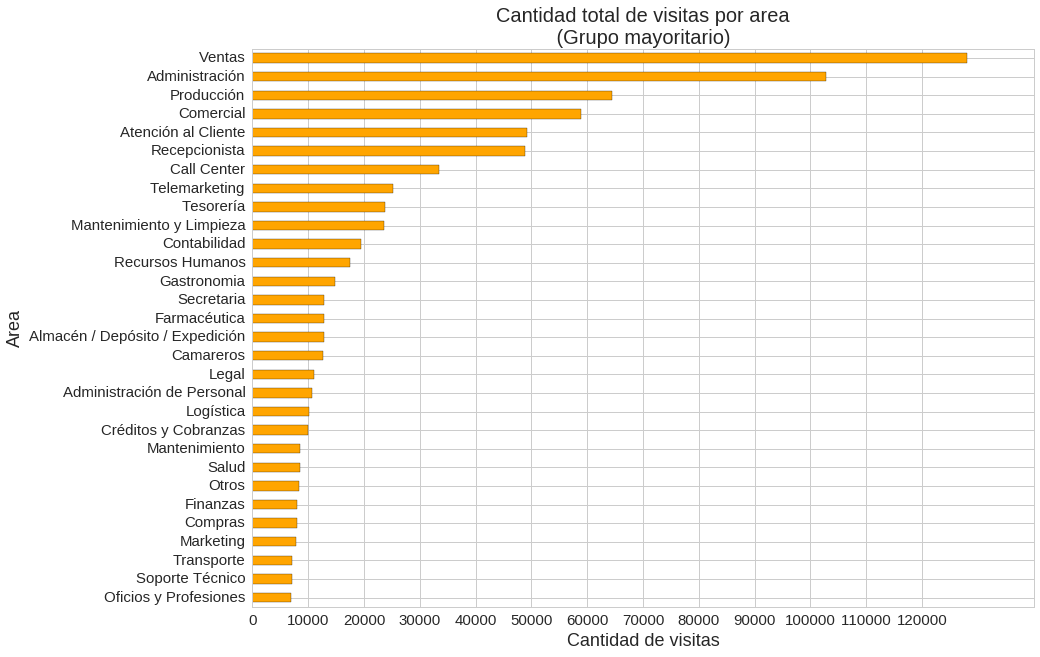

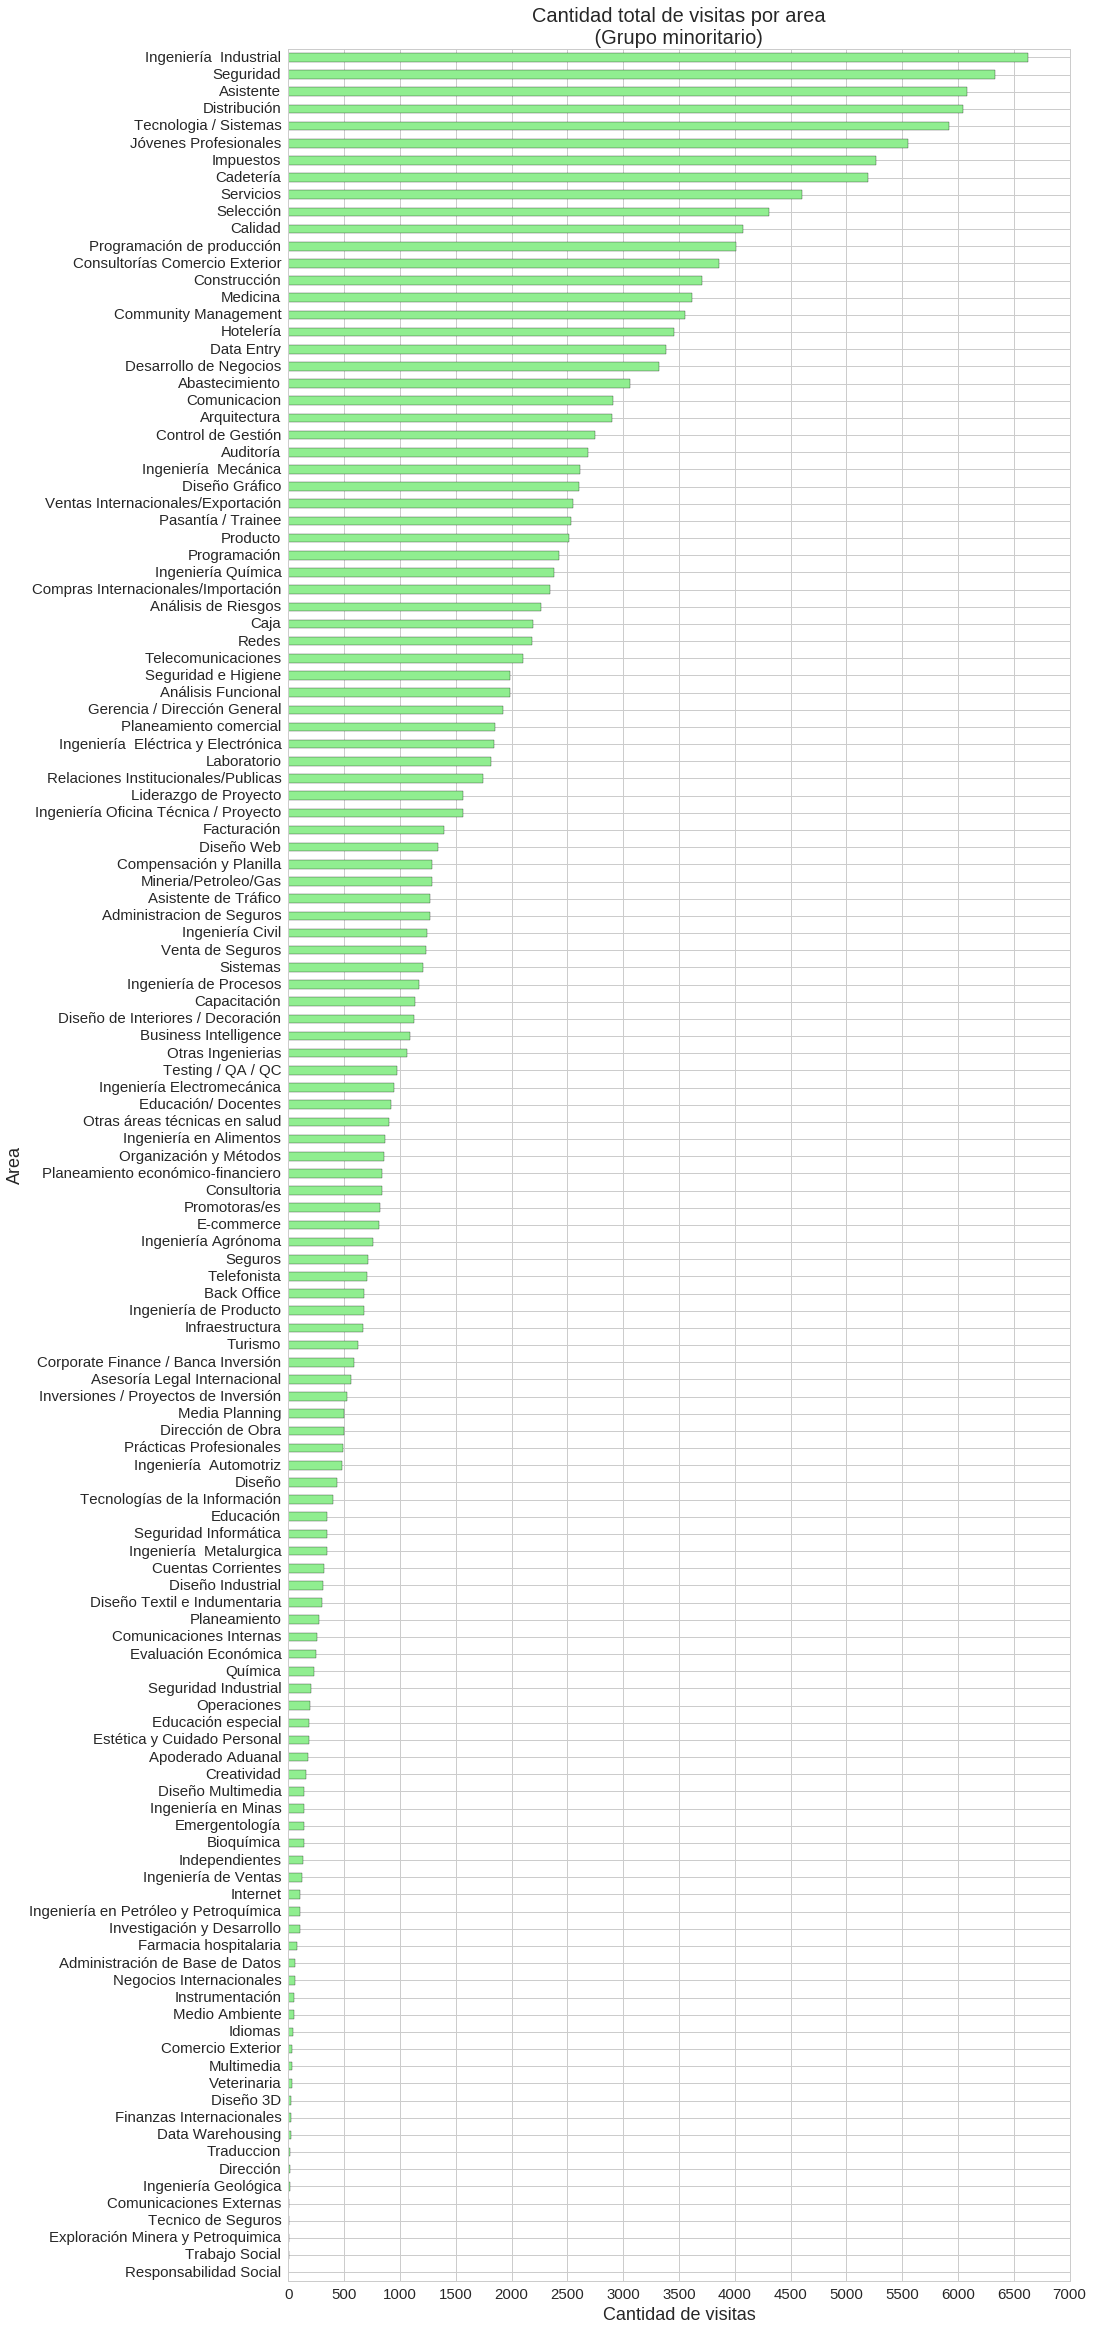

In [11]:
plot = df_temp.groupby('nombre_area').sum()['cant'].sort_values().tail(30).plot.barh(figsize=(14,10),fontsize=15, color='orange');
plot.set_title("Cantidad total de visitas por area\n (Grupo mayoritario) ", fontsize=20)
plot.set_ylabel("Area", fontsize=18)
plot.set_xlabel("Cantidad de visitas", fontsize=18)
plot.set_xticks(range(0, 120001, 10000))
plt.show()

plot = df_temp.groupby('nombre_area').sum()['cant'].sort_values()[:-30].plot.barh(figsize=(14,40),fontsize=15, color='lightgreen');
plot.set_title("Cantidad total de visitas por area\n (Grupo minoritario) ", fontsize=20)
plot.set_ylabel("Area", fontsize=18)
plot.set_xlabel("Cantidad de visitas", fontsize=18)
plot.set_xticks(range(0, 7001, 500))
plt.show()